# Bagging and Random Forests

Bagging is an ensemble method involving training the same algorithm many times using different subsets sampled from the training data. In this chapter, you'll understand how bagging can be used to create a tree ensemble. You'll also learn how the random forests algorithm can lead to further ensemble diversity through randomization at the level of each split in the trees forming the ensemble.

## Define the bagging classifier

In the following exercises you'll work with the Indian Liver Patient dataset from the UCI machine learning repository. Your task is to predict whether a patient suffers from a liver disease using 10 features including Albumin, age and gender. You'll do so using a Bagging Classifier.

In [44]:
## Preprocessing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data=pd.read_csv("indian_liver_patient_preprocessed.csv",index_col=0)
data.head()

,Age_std,Total_Bilirubin_std,Direct_Bilirubin_std,Alkaline_Phosphotase_std,Alamine_Aminotransferase_std,Aspartate_Aminotransferase_std,Total_Protiens_std,Albumin_std,Albumin_and_Globulin_Ratio_std,Is_male_std,Liver_disease
0,1.247403,-0.420320,-0.495414,-0.428870,-0.355832,-0.319111,0.293722,0.203446,-0.147390,0,1
1,1.062306,1.218936,1.423518,1.675083,-0.093573,-0.035962,0.939655,0.077462,-0.648461,1,1
2,1.062306,0.640375,0.926017,0.816243,-0.115428,-0.146459,0.478274,0.203446,-0.178707,1,1
3,0.815511,-0.372106,-0.388807,-0.449416,-0.366760,-0.312205,0.293722,0.329431,0.165780,1,1
4,1.679294,0.093956,0.179766,-0.395996,-0.295731,-0.177537,0.755102,-0.930414,-1.713237,1,1


In [35]:
data.shape
#data.Gender=data.Gender.map({'Male':1,'Female':0})

In [14]:
#data.Dataset.unique()

array([1, 2], dtype=int64)

In [45]:
# Set seed for reproducibility
SEED=1
X=data.drop('Liver_disease', axis=1)
y=data['Liver_disease']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, stratify=y, random_state=SEED)

In [46]:
X_train.head()

,Age_std,Total_Bilirubin_std,Direct_Bilirubin_std,Alkaline_Phosphotase_std,Alamine_Aminotransferase_std,Aspartate_Aminotransferase_std,Total_Protiens_std,Albumin_std,Albumin_and_Globulin_Ratio_std,Is_male_std
150,0.692113,-0.356035,-0.353271,-0.457635,-0.279340,-0.236238,0.385998,0.833369,0.792118,1
377,-1.529043,-0.436391,-0.459878,-0.367231,-0.377687,-0.336376,-0.352211,-0.174507,-0.147390,0
473,-0.171670,-0.372106,-0.424343,-0.564476,-0.235630,-0.308752,0.293722,0.959354,1.105288,1
285,-1.960935,-0.291751,-0.353271,1.165532,-0.284804,-0.298393,1.308759,0.959354,-0.147390,1
358,-0.480164,-0.420320,-0.459878,-0.474072,-0.290267,-0.263863,-0.813592,-0.678445,-0.460559,1


In [53]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=100, random_state=1)

In the following exercise, you'll train bc and evaluate its test set performance.

In [57]:
# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test))

Test set accuracy of bc: 0.69


Using 1 decision tree

In [56]:
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

acc_test_dt = accuracy_score(y_test, y_pred_dt)
print('Test set accuracy of dt: {:.2f}'.format(acc_test_dt))

Test set accuracy of dt: 0.63


## Out of Bag Evaluation

Recall that in bagging, some instances may be sampled several times for one model. On the other hand, other instance may not be sampled at all.

On average, for each model, 63% of the training instances are sampled. The remaining 37% that are not sampled constitute what is known as the Out-of-bag or OOB instances. Since OOB instances are not seen by a model during training, these can be used to estimate the performance of the ensemble without the need for cross-validation. This technique is known as OOB-evaluation.

Note that in scikit-learn, the OOB-score corresponds to the accuracy for classifiers and the r-squared score for regressors. Now fit bc to the training set and predict the test set labels.

### Prepare the ground

In the following exercises, you'll compare the OOB accuracy to the test set accuracy of a bagging classifier trained on the Indian Liver Patient dataset.

In sklearn, you can evaluate the OOB accuracy of an ensemble classifier by setting the parameter oob_score to True during instantiation. After training the classifier, the OOB accuracy can be obtained by accessing the .oob_score_ attribute from the corresponding instance.

In your environment, we have made available the class DecisionTreeClassifier from sklearn.tree.

In [58]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, 
            n_estimators=50,
            oob_score=True,
            random_state=1)

In the following exercise, you'll train bc and compare its test set accuracy to its OOB accuracy.

### OOB Score vs Test Set Score

Now that you instantiated bc, you will fit it to the training set and evaluate its test set and OOB accuracies.

The dataset is processed for you and split into 80% train and 20% test. The feature matrices X_train and X_test, as well as the arrays of labels y_train and y_test are available in your workspace. In addition, we have also loaded the classifier bc instantiated in the previous exercise and the function accuracy_score() from sklearn.metrics.

In [59]:
# Fit bc to the training set 
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
acc_test = accuracy_score(y_test, y_pred)

# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

Test set accuracy: 0.698, OOB accuracy: 0.702


The test set accuracy and the OOB accuracy of bc are both roughly equal to 70%!

## Random Forests (RF)

In Bagging, the base estimator can be anything, including Decision Tree, Logistic Regression, Neural Net,....

$d=\sqrt num~of~features$

**Feature Importance**

When a tree based method is trained, the predictive power of a feature or its importance can be assessed. In scikit-learn, feature importance is assessed by measuring how much the tree nodes use a particular feature to reduce impurity.

In [60]:
bike=pd.read_csv("bikes.csv")
bike.head()

,hr,holiday,workingday,temp,hum,windspeed,cnt,instant,mnth,yr,Clear to partly cloudy,Light Precipitation,Misty
0,0,0,0,0.76,0.66,0.0000,149,13004,7,1,1,0,0
1,1,0,0,0.74,0.70,0.1343,93,13005,7,1,1,0,0
2,2,0,0,0.72,0.74,0.0896,90,13006,7,1,1,0,0
3,3,0,0,0.72,0.84,0.1343,33,13007,7,1,1,0,0
4,4,0,0,0.70,0.79,0.1940,4,13008,7,1,1,0,0


In [65]:
col=['hr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'instant', 'mnth', 'yr', 'Clear to partly cloudy',
       'Light Precipitation', 'Misty']

Index(['hr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'instant', 'mnth', 'yr', 'Clear to partly cloudy',
       'Light Precipitation', 'Misty'],
      dtype='object')

In [67]:
bike['cnt'].nunique()

606

In [72]:
X=bike.drop('cnt',axis='columns')
y=bike['cnt']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=1)

### Train an RF regressor

In the following exercises you'll predict bike rental demand in the Capital Bikeshare program in Washington, D.C using historical weather data from the Bike Sharing Demand dataset available through Kaggle. For this purpose, you will be using the random forests algorithm. As a first step, you'll define a random forests regressor and fit it to the training set.

The dataset is processed for you and split into 80% train and 20% test. The features matrix X_train and the array y_train are available in your workspace.

**Instructions**

* Import RandomForestRegressor from sklearn.ensemble.

* Instantiate a RandomForestRegressor called rf consisting of 25 trees.

* Fit rf to the training set.

In [74]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,
            random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train, y_train) 

RandomForestRegressor(n_estimators=25, random_state=2)

Next comes the test set RMSE evaluation part.

### Evaluate the RF regressor

You'll now evaluate the test set RMSE of the random forests regressor rf that you trained in the previous exercise.

The dataset is processed for you and split into 80% train and 20% test. The features matrix X_test, as well as the array y_test are available in your workspace. In addition, we have also loaded the model rf that you trained in the previous exercise.

In [77]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = (MSE(y_test,y_pred))**(1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 51.84


You can try training a single CART on the same dataset. The test set RMSE achieved by rf is significantly smaller than that achieved by a single CART!

### Visualizing features importances

In this exercise, you'll determine which features were the most predictive according to the random forests regressor rf that you trained in a previous exercise.

For this purpose, you'll draw a horizontal barplot of the feature importance as assessed by rf. Fortunately, this can be done easily thanks to plotting capabilities of pandas.

We have created a pandas.Series object called importances containing the feature names as index and their importances as values. In addition, matplotlib.pyplot is available as plt and pandas as pd.

**Instructions**

* Call the .sort_values() method on importances and assign the result to importances_sorted.

* Call the .plot() method on importances_sorted and set the arguments:

    * kind to 'barh'
    * color to 'lightgreen'

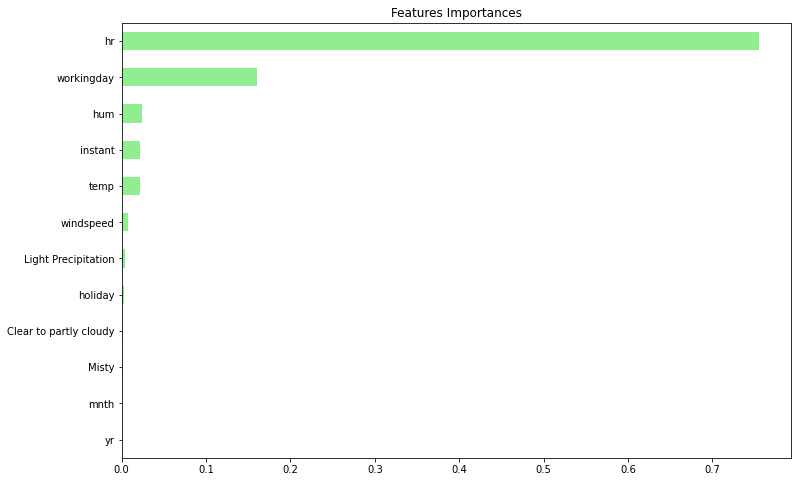

In [79]:
import matplotlib.pyplot as plt

# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

plt.figure(figsize=(12,8))
# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

Apparently, hr and workingday are the most important features according to rf. The importances of these two features add up to more than 90%!